# Instagram User Analytics
## Narpat Kumar

## Project Description
1. The Project is about helping the Marketing Team of Instagram to launch some campaigns and their Investors, who wants to know if Instagram is performing well and is not becoming redundant like Facebook. 
2. The Marketing team wants to know about their **Loyal (oldest) users**, **Inactive users**, **Host contest**, know about the popular **Hashtags** their users are using, and launch ads based on days when the users are registering. 
3. The Investors want to know about the **User Engagement**, and about **Bots and Fake accounts** on Instagram.<br><br>
To meet the objectives aforementioned and help the Marketing Team and the Investors, I integrate the Jupyter Notebook with MySQL. By integrating both the environments, I can run different queries and get results. I hope the results I get are same as expected by the Team and Investors, and they help them increase the success rate and improve the overall experience of their App. 

## Approach
A Database with the name '**ig_clone**' is created following the steps mentioned in [Database](https://docs.google.com/document/d/1-WhNRX1iYJIz7e5l28DMPWgsPklpE_w6/edit). After the database is created the next step is to **integrate the Jupyter Notebook and MySQL** environments. This is implemented using the '**mysql.connector**' module. The '**connect**' function of the module lets us establish a connection with the Database. After the connection is established the '**cursor()**' function is used to create a **cursor**, and this cursor can be used to execute different SQL queries using the '**execute()**' method, which takes in one parameter, the **query** that is to be executed. Different SQL queries are executed corresponding to the different requirements. The results of the queries can be transported into a Pandas DataFrame, which can be used for further analysis, including visualization.

## 'ig_clone' Database
The **ig_clone** database contains the following tables with corresponding columns:
1. **users** - gives information about the users registered.
    - **id** - the user id
    - **username** - the username of the user
    - **created_at** - the date and time when the user registered on Instagram
2. **photos** - gives information about the photos uploaded.
	- **id** - the photo id
    - **image_url** - the images' url
    - **user_id** - the id of the user who uploaded the image
    - **created_dat** - the date and time when the photo was uploaded
3. **tags** - gives information about the different hashtags used on the photos.
	- **id** - tag id
    - **tag_name** - hashtag name
    - **created_at** - the date and time of tag creation
4. **photo_tags** - gives information of the tags used on different photos
	- **photo_id** - the id of the photo with tags
    - **tag_id** - the id of the hashtag used
5. **likes** - gives information about users who have liked a particular photo
	- **user_id** - id of the user who have liked the photo
    - **photo_id** - id of the photo the user have liked
    - **created_at** - the date and time of liking the photo
6. **comments** - gives information about the comments received on a photo 
	- **id** - comment id
    - **comment_text** - the comment posted
    - **user_id** - id of the user who has posted the comment
    - **photo_id** - id of the photo with the comment
    - **created_at** - the date and time of posting the comment
7. **follows** - gives information about the followers and followings
	- **follower_id** - id of the follower
    - **followee_id** - id of the followee
    - **created_at** - the date and time when the followee was followed.
	

## Tech-Stack Used
- MySQL -  8.0.31
- Jupyter Notebook - 6.4.8

##### importing required libraries

In [1]:
# importing the required libraries
import mysql.connector
from mysql.connector import Error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### establishing Database connection

In [2]:
# MySQL and database parameters
host_name = "localhost"
user_name = "root"
user_pass = "Narpat_PASSWORD"
db_name = "ig_clone"

# connecting to the database
try:
    connection = mysql.connector.connect(
        host = host_name,
        user = user_name,
        passwd = user_pass,
        database = db_name
    )
    print("MySQL Database Connection Successful.")
except Error as err:
    print(f"Error: '{err}'")

MySQL Database Connection Successful.


We can see a Successful Connection has been established. This **connection** can be used for running SQL queries according to different requirements.

##### creating a user-defined function to execute queries

In [3]:
# function to execute a query
def execute_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

The '**execute_query()**' function takes in two parameters, the **connection** and the **query** that is to be executed. The results of the query are fetched using the '**fetchall()**' method and stored in a variable **result**, which is returned upon successful execution of the query.

## User Analysis

### Marketing
The marketing team wants help with the following:
- Rewarding the most **loyal users** - They want to know about their five oldest users.
- Remind **inactive users** - They want to know about those users who haven't posted anything yet on their platform.
- Declare **contest winner** - They want to host a contest, and the user who gets the most likes on a single photo wins the contest.
- **Hashtag** reasearching - Know about the five most used hashtags.
- Launch **ad campaigns** - To know which day would be the best day to launch ads.

#### 1. Rewarding the most Loyal Users
For rewarding the most loyal users, the team wants to know about the five oldest users on their platform.

In [4]:
# query for finding the loyal users
loyal = """select * from users
order by created_at
limit 5;"""

In [5]:
# result of the query
results = execute_query(connection, loyal)

# empty list to store the results
query_results = []
# storing the results
for result in results:
    result = list(result)
    query_results.append(result)

# columns for the dataframe
columns = ['id', 'username', 'created_at']

# dataframe containing the results
loyal_users = pd.DataFrame(query_results, columns = columns)

In [6]:
# printing the dataframe
loyal_users

,id,username,created_at
0,80,Darby_Herzog,2016-05-06 00:14:21
1,67,Emilio_Bernier52,2016-05-06 13:04:30
2,63,Elenor88,2016-05-08 01:30:41
3,95,Nicole71,2016-05-09 17:30:22
4,38,Jordyn.Jacobson2,2016-05-14 07:56:26


The successful execution of the query gives us the five oldest users on Instagram. The users (usernames) being **Darby_Herzog**, **Emilio_Bernier52**, **Elenor88**, **Nicole71**, and **Jordyn.Jacobson2**. The team can reward these users for being loyal towards their product.

#### 2. Reminding Inactive Users
The team wants to remind the inactive users to post their first photo on Instagram. For this they want to know about the users who haven't posted any photos yet. To know about those users, we first find those users who have posted atleast one photo. Then we compare with the total users and find the ones who haven't posted any photo.

In [7]:
# users who haven't uploaded any pics on insta
inactive = """ select id, username from users where id not in (select distinct user_id from photos);"""

In [8]:
# result of the query
results = execute_query(connection, inactive)

# empty list for storing the result
query_results = []
# storing the results
for result in results:
    result = list(result)
    query_results.append(result)

# columns for the dataframe
columns = ['id', 'username']

# dataframe containing the results
inactive_users = pd.DataFrame(query_results, columns = columns)

In [9]:
inactive_users

,id,username
0,5,Aniya_Hackett
1,7,Kasandra_Homenick
2,14,Jaclyn81
3,21,Rocio33
4,24,Maxwell.Halvorson
5,25,Tierra.Trantow
6,34,Pearl7
7,36,Ollie_Ledner37
8,41,Mckenna17
9,45,David.Osinski47


The above is the list of the users who haven't posted any photos yet on Instagram. It can be seen that one-fourth of the total users (26/100) are inactive. The team can send them promotional mails and remind them to post their first photo on Instagram. By reminding them, the team can improve the user activity and learn more about what campaigns to launch based on the type of photos uploaded.

#### 3. Declaring Contest Winners
The product team has hosted a contest on their platform and the user with the most number of likes on a single photo is to be declared the winner. For this, we first find the photo with the most number of likes. Then we find the id of the user who has uploaded that photo. Finally we display the username for the corresponding user id. 

In [10]:
# query to find the most liked photo
five_most_liked_photo = """ select * from (select photo_id, count(*) as total
from likes group by photo_id order by total desc limit 5) sub;"""

In [11]:
# result of the query
results = execute_query(connection, five_most_liked_photo)

# empty list for storing the result
query_results = []
# storing the results
for result in results:
    result = list(result)
    query_results.append(result)

# columns for the dataframe
columns = ['photo_id', 'likes']

# dataframe containing the results
most_liked_photos = pd.DataFrame(query_results, columns = columns)

In [12]:
most_liked_photos

,photo_id,likes
0,145,48
1,127,43
2,182,43
3,123,42
4,61,41


<AxesSubplot:xlabel='photo_id', ylabel='likes'>

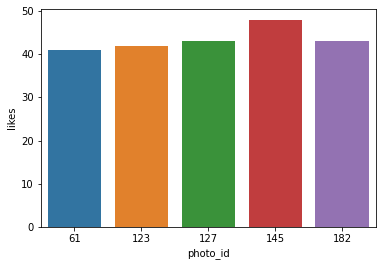

In [13]:
# barplot for the most liked photos
sns.barplot(x='photo_id', y='likes', data=most_liked_photos)

The result of the query gives the top five most liked photos on Instagram. We can see from the **dataframe** and **barplot** that the photo with id **145** has the most likes. Now, we find the user who has uploaded that photo. For this, we get the details of the photo from the **photos** table.

In [14]:
# query for the details of the photo
photo_details = """ select * from photos
where id = (select photo_id from (select photo_id, count(*) as total
from likes group by photo_id order by total desc limit 1) sub);"""

In [15]:
# result of the query
results = execute_query(connection, photo_details)

# details of the most liked photo 
for result in results:
    print(result)

(145, 'https://jarret.name', 52, datetime.datetime(2023, 5, 15, 17, 39, 30))


From the result we can see that the most liked photo was uploaded by user with **user_id 52**. Now we find the detials of the user with id 52.

In [16]:
# query to find the user with the most likes
user = """select id, username from users 
where id = (select user_id from photos 
where id = (select photo_id from (select photo_id, count(*) as total 
from likes group by photo_id order by total desc limit 1) sub));"""

In [17]:
# result of the query
results = execute_query(connection, user)

# winner
for result in results:
    print(result)

(52, 'Zack_Kemmer93')


The user with id **52** having username **Zack_Kemmer93** is the winner of the contest. It seems the user has uploaded a really nice photo due to which he has received the most likes. By hosting similar contests and rewarding the users, the platform can expect more participations and different users can upload a variety of photos, which can further increase the user activity and improve the contents that can be found on the application. 

#### 4. Hashtag Researching
The team wants to know about the most used Hashtags, i.e., **top five hashtags** on the photos uploaded on Instagram. With this, they can gather information and make analysis of the different contents that can be found on their platform.

In [18]:
# tags with the most count
tag_count = """select tag_id, count(*) as total from photo_tags group by tag_id order by total desc;"""

In [19]:
# result of the query
results = execute_query(connection, tag_count)

# empty list for storing the result
query_results = []
# storing the results
for result in results:
    result = list(result)
    query_results.append(result)

# columns for the dataframe
columns = ['tag_id', 'count']

# dataframe containing the results
tag_ids = pd.DataFrame(query_results, columns = columns)

In [20]:
# displaying the first 5 results
tag_ids.head()

,tag_id,count
0,21,59
1,20,42
2,17,39
3,13,38
4,5,24


<AxesSubplot:xlabel='tag_id', ylabel='count'>

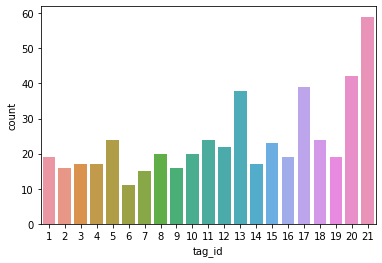

In [21]:
# barplot for most used tags
sns.barplot(x='tag_id', y='count', data=tag_ids)

The barplot shows the count of each tag_id. From the barplot we can conclude that id **21** has the most number of count, i.e., it has been used the most number of times.

In [22]:
# query for the top 5 hashtags used
hashtags = """select tag_name from tags where id in (select tag_id from (select tag_id, count(*) as total 
from photo_tags group by tag_id order by total desc limit 5) sub);"""

In [23]:
# result of the query
results = execute_query(connection, hashtags)

# empty list for storing the result
query_results = []
# storing the results
for result in results:
    result = list(result)
    query_results.append(result)

# columns for the dataframe
columns = ['Tag_Name']

# dataframe containing the results
most_used_hashtags = pd.DataFrame(query_results, columns = columns)

In [24]:
most_used_hashtags

,Tag_Name
0,smile
1,beach
2,party
3,fun
4,concert


We get the top five most used hashtags. The tags include **smile**, **beach**, **party**, **fun**, and **concert**. We can make an analysis on the kind of photos uploaded on Instagram based on these tags. It won't be wrong to assume that most photos uploaded are related to **beach parties** and **beach concerts**.

#### 5. Launch Ad Campaign 
The product team wants to know about the day of the week which would be best for launching ads. For this, we find the days on which most of the users have registered. To find the day of the week based on the date, we use the SQL's in-built function **WEEKDAY()**, which gives the day of the week by passing the **DATETIME** column or values. 
The function returns values from **0** to **6**. 
- **0 - Monday**
- **1 - Tuesday**
- **2 - Wednesday**
- **3 - Thursday**
- **4 - Friday**
- **5 - Saturday**, and
- **6 - Sunday**

In [25]:
# query for finding the day count
day_count = """select weekday(created_at) as week, count(*) as total from users group by week;"""

In [26]:
# result of the query
results = execute_query(connection, day_count)

# empty list for storing the result
query_results = []
# storing the results
for result in results:
    result = list(result)
    query_results.append(result)

# columns for the dataframe
columns = ['week', 'count']

# dataframe containing the results
day_counts = pd.DataFrame(query_results, columns = columns)

In [27]:
day_counts

,week,count
0,3,16
1,6,16
2,1,14
3,5,12
4,2,13
5,0,14
6,4,15


<AxesSubplot:xlabel='week', ylabel='count'>

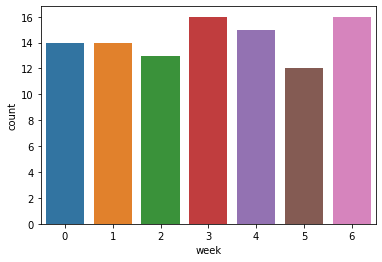

In [28]:
# barplot for count of days of the week
sns.barplot(x='week', y='count', data=day_counts)

From the dataframe and the barplot we can see that the days **3** and **6** are the days when most of the users have registered on Instagram. The days corresponding to 3 and 6 are **Thursday** and **Sunday**, i.e., most of the users have registered on Thursday and Sunday. The number of users who have registered on **Friday** is also comparable to Thursday and Friday. The Marketing team can schedule an ad campaign on these days to get user attraction and improve the success rate and overall experience of the applocation.

### Investor Metrics
The Investors wants help with the following:
- Know about **User Engagement** - about how many times an average user posts on Instagram and the total number of photos on Instagram/total number of users
- Know about **Bots and Fake accounts** - details of those users who have liked every single photo on the site.

#### 1. User Engagement
- To calculate how many times an average user posts on Instagram, we first find the number of photos uploaded by each user. The results are stored in a Dataframe, and the '**mean()**' function is applied on the '**count**' column to get the mean. 
- The total number of photos on Instagram can be found by counting the **unique photo id** from the **photos** table, and the total number of users can be found by counting the **unique user id** from the **users** table. The total number of photos on Instagram/total number of users can be calculated by simply dividing these values.

In [29]:
# query to find the number of photos uploadedby each user
upload = """select user_id, count(*) as total_number_of_pics from photos group by user_id;"""

In [30]:
# result of the query
results = execute_query(connection, upload)

# empty list for storing the result
query_results = []
# storing the results
for result in results:
    result = list(result)
    query_results.append(result)

# columns for the dataframe
columns = ['user_id', 'photos_uploaded']

# dataframe containing the results
photo_number = pd.DataFrame(query_results, columns = columns)

In [31]:
# displaying the first 20 results
photo_number.head(20)

,user_id,photos_uploaded
0,1,5
1,2,4
2,3,4
3,4,3
4,6,5
5,8,4
6,9,4
7,10,3
8,11,5
9,12,4


In [32]:
# average number of times
mean_value = photo_number['photos_uploaded'].mean()
mean = round(mean_value, 2)
print("Mean: ", mean)

Mean:  3.47


We can see that an average user posts 3.47 times. 

In [33]:
# query to get the total count of photos
total_photos = """select count(id) as total from photos;"""
total_users = """select count(id) as total from users;"""

In [34]:
# result for the queries
result1 = execute_query(connection, total_photos)
result2 = execute_query(connection, total_users)

In [35]:
for res1 in result1:
    tot_photos = res1[0] # total number of photos

for res2 in result2:
    tot_users = res2[0] # total number of users

In [36]:
# total number of photos on Instagram/total number of users
average = tot_photos/tot_users
print(f"Total number of photos on Instagram/total number of users = {average}")

Total number of photos on Instagram/total number of users = 2.57


We can see that the average user posts about 3.47 times and the ratio of total number of photos to the total number of users is 2.57. The average and the ratio is less when compared to the time the users have spent on Instagram. The main reason for the ratio to be low is due to the inactive users which are nearly one-fourth of the total users.

#### 2. Bots and Fake Accounts 
The Investors want to know about the **bots** and **fake accounts** that are there on Instagram. **Bots** are basically those accounts who have **liked every photo** on the application, as it is impossible for a normal user to like every photo present. We know that the total number of photos uploaded on Instagram is **257**. So from the **likes** table, which gives information about the photos liked by a particular user, we can count the number of photos liked by a user. And, if the number of photos liked by a user is equal to the total number of photos we can declare that user as a bot.<br>
First we find those users who have liked every photo, i.e., all the **257** photos uploaded on Instagram, from the **likes** table, then we display the details of the users from the **users** table.

In [37]:
# query to display those users who have liked all the 257 photos 
bots = """select user_id from (select user_id, count(*) as total from likes group by user_id) sub where total = 257;"""

In [38]:
# result of the query
results = execute_query(connection, bots)

# empty list for storing the result
query_results = []
# storing the results
for result in results:
    result = list(result)
    query_results.append(result)

# columns for the dataframe
columns = ['user_id']

# dataframe containing the results
bots = pd.DataFrame(query_results, columns = columns)

In [39]:
bots

,user_id
0,5
1,14
2,21
3,24
4,36
5,41
6,54
7,57
8,66
9,71


In [40]:
# displaying the details of the bots
bot_details = """select id, username from users
where id in
(select user_id from (select user_id, count(*) as total from likes group by user_id) sub where total = 257);"""

In [41]:
# result of the query
results = execute_query(connection, bot_details)

# empty list for storing the result
query_results = []
# storing the results
for result in results:
    result = list(result)
    query_results.append(result)

# columns for the dataframe
columns = ['id', 'username']

# dataframe containing the results
bot_details = pd.DataFrame(query_results, columns = columns)

In [42]:
bot_details

,id,username
0,5,Aniya_Hackett
1,14,Jaclyn81
2,21,Rocio33
3,24,Maxwell.Halvorson
4,36,Ollie_Ledner37
5,41,Mckenna17
6,54,Duane60
7,57,Julien_Schmidt
8,66,Mike.Auer39
9,71,Nia_Haag


The result of the query gives the **id** and the **username** of the **bots**, users who have liked every photo on Instagram. We can see that the count of the bots is **13**, which is **13%** of the total users.

### Results
During the process of completing this project I was able to execute different SQL queries and find answers to different questions put forward by the **Product** team, and I hope that the answers are in correspondence with their requirements.
- After running the different queries, I found that almost **one-fourth** (26 users) of the total users are **inactive** and **13%** of the total users are **bots**. This means that, almost **40%** (39 users) of the total users are not actively participating in **User Engagement**.
- Less **User Activities** implies less attractive **investors**. 
- The product team should make sure that there is **increase** in the number of active users. This can be done by reminding them to upload photos and hosting contests on their platform.
- If bots are liking all the photos, there will be photos that feature unnecessarily in users' feed. These photos might not be relevant to the user and the user might just scroll without engaging with them. This leads to less user engagement.
<br><br>
Overall the Product team should make sure there is high percentage of active users and try to decrease the number of bot accounts. This will lead to increase in **content** available and improve the user engagement. This will attract investors, improve the success rate of the application, and improve the experience altogether while helping the business grow.